In [3]:
# for data analysis
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/projects/250c93cf-311b-4af0-b0c9-a55b21af396c/Fernanda/aicamp_nb/lectures/data_fundamentals/datasets/us_covid19_202007.csv', sep='\t', encoding='utf-8')
data = data.dropna()
data.isna().sum()

/tmp/ipykernel_41554/710154570.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  data = data.dropna('Unamed:0')


ValueError: No axis named Unamed:0 for object type DataFrame

In [14]:
#provides unique values
data.CountryCode.unique()

array(['US'], dtype=object)

In [18]:
data.Country.unique()

array(['United States of America'], dtype=object)

In [20]:
#lists the columns from data
data.columns

Index(['Unnamed: 0', 'Country', 'CountryCode', 'Province', 'City', 'CityCode',
       'Lat', 'Lon', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Date'],
      dtype='object')

In [24]:
# data frame to equal specific subset
ny_cities = data[data.Province=='New York']
ny_cities

,Unnamed: 0,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
2337,2337,United States of America,US,New York,Rockland,36087.0,41.15,-74.03,0,0,0,0,2020-01-23T00:00:00Z
2338,2338,United States of America,US,New York,Saratoga,36091.0,43.11,-73.87,0,0,0,0,2020-01-23T00:00:00Z
2339,2339,United States of America,US,New York,Schenectady,36093.0,42.82,-74.05,0,0,0,0,2020-01-23T00:00:00Z
2340,2340,United States of America,US,New York,Schoharie,36095.0,42.59,-74.44,0,0,0,0,2020-01-23T00:00:00Z
2341,2341,United States of America,US,New York,Schuyler,36097.0,42.39,-76.88,0,0,0,0,2020-01-23T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
533902,533902,United States of America,US,New York,Wayne,36117.0,43.15,-77.03,174,3,0,171,2020-07-01T00:00:00Z
533903,533903,United States of America,US,New York,Westchester,36119.0,41.16,-73.76,34866,1425,0,33441,2020-07-01T00:00:00Z
533904,533904,United States of America,US,New York,Wyoming,36121.0,42.70,-78.22,95,5,0,90,2020-07-01T00:00:00Z
533905,533905,United States of America,US,New York,Yates,36123.0,42.64,-77.10,46,6,0,40,2020-07-01T00:00:00Z


In [71]:
ca_cities = data[data.Province=='California']
ca_cities

,Unnamed: 0,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
942,942,United States of America,US,California,Alameda,6001.0,37.65,-121.89,0,0,0,0,2020-01-23T00:00:00Z
943,943,United States of America,US,California,Alpine,6003.0,38.60,-119.82,0,0,0,0,2020-01-23T00:00:00Z
944,944,United States of America,US,California,Amador,6005.0,38.45,-120.66,0,0,0,0,2020-01-23T00:00:00Z
945,945,United States of America,US,California,Butte,6007.0,39.67,-121.60,0,0,0,0,2020-01-23T00:00:00Z
946,946,United States of America,US,California,Calaveras,6009.0,38.21,-120.55,0,0,0,0,2020-01-23T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534976,534976,United States of America,US,California,Mariposa,6043.0,37.58,-119.91,27,1,0,26,2020-07-01T00:00:00Z
534977,534977,United States of America,US,California,Mendocino,6045.0,39.44,-123.39,85,0,0,85,2020-07-01T00:00:00Z
534978,534978,United States of America,US,California,Merced,6047.0,37.19,-120.72,1131,11,0,1120,2020-07-01T00:00:00Z
534979,534979,United States of America,US,California,Modoc,6049.0,41.59,-120.72,0,0,0,0,2020-07-01T00:00:00Z


In [29]:
#group data
ca = ca_cities.groupby(['Province', 'Date'])
ca

In [30]:
#reset index because we messed it up by removing the n/a rows 
ca.Confirmed.sum().reset_index()

,Province,Date,Confirmed
0,California,2020-01-23T00:00:00Z,0
1,California,2020-01-24T00:00:00Z,0
2,California,2020-01-25T00:00:00Z,0
3,California,2020-01-26T00:00:00Z,2
4,California,2020-01-27T00:00:00Z,2
...,...,...,...
156,California,2020-06-27T00:00:00Z,210692
157,California,2020-06-28T00:00:00Z,215487
158,California,2020-06-29T00:00:00Z,223646
159,California,2020-06-30T00:00:00Z,231418


In [33]:
ny = ny_cities.groupby(['Province', 'Date'])
ny.Confirmed.sum().reset_index()


,Province,Date,Confirmed
0,New York,2020-01-23T00:00:00Z,0
1,New York,2020-01-24T00:00:00Z,0
2,New York,2020-01-25T00:00:00Z,0
3,New York,2020-01-26T00:00:00Z,0
4,New York,2020-01-27T00:00:00Z,0
...,...,...,...
156,New York,2020-06-27T00:00:00Z,391923
157,New York,2020-06-28T00:00:00Z,392539
158,New York,2020-06-29T00:00:00Z,392930
159,New York,2020-06-30T00:00:00Z,393454


In [72]:
ca = ca_cities.groupby(['Province', 'Date']).Confirmed.sum().reset_index()
print(ca.tail(10))


       Province                  Date  Confirmed
151  California  2020-06-22T00:00:00Z     184765
152  California  2020-06-23T00:00:00Z     191477
153  California  2020-06-24T00:00:00Z     196024
154  California  2020-06-25T00:00:00Z     201112
155  California  2020-06-26T00:00:00Z     206844
156  California  2020-06-27T00:00:00Z     210692
157  California  2020-06-28T00:00:00Z     215487
158  California  2020-06-29T00:00:00Z     223646
159  California  2020-06-30T00:00:00Z     231418
160  California  2020-07-01T00:00:00Z     238681


In [73]:
ny = ny_cities.groupby(['Province', 'Date']).Confirmed.sum().reset_index()
ny

,Province,Date,Confirmed
0,New York,2020-01-23T00:00:00Z,0
1,New York,2020-01-24T00:00:00Z,0
2,New York,2020-01-25T00:00:00Z,0
3,New York,2020-01-26T00:00:00Z,0
4,New York,2020-01-27T00:00:00Z,0
...,...,...,...
156,New York,2020-06-27T00:00:00Z,391923
157,New York,2020-06-28T00:00:00Z,392539
158,New York,2020-06-29T00:00:00Z,392930
159,New York,2020-06-30T00:00:00Z,393454


In [74]:
ca['Date'] = pd.to_datetime(ca['Date'])
ny['Date'] = pd.to_datetime(ny['Date'])

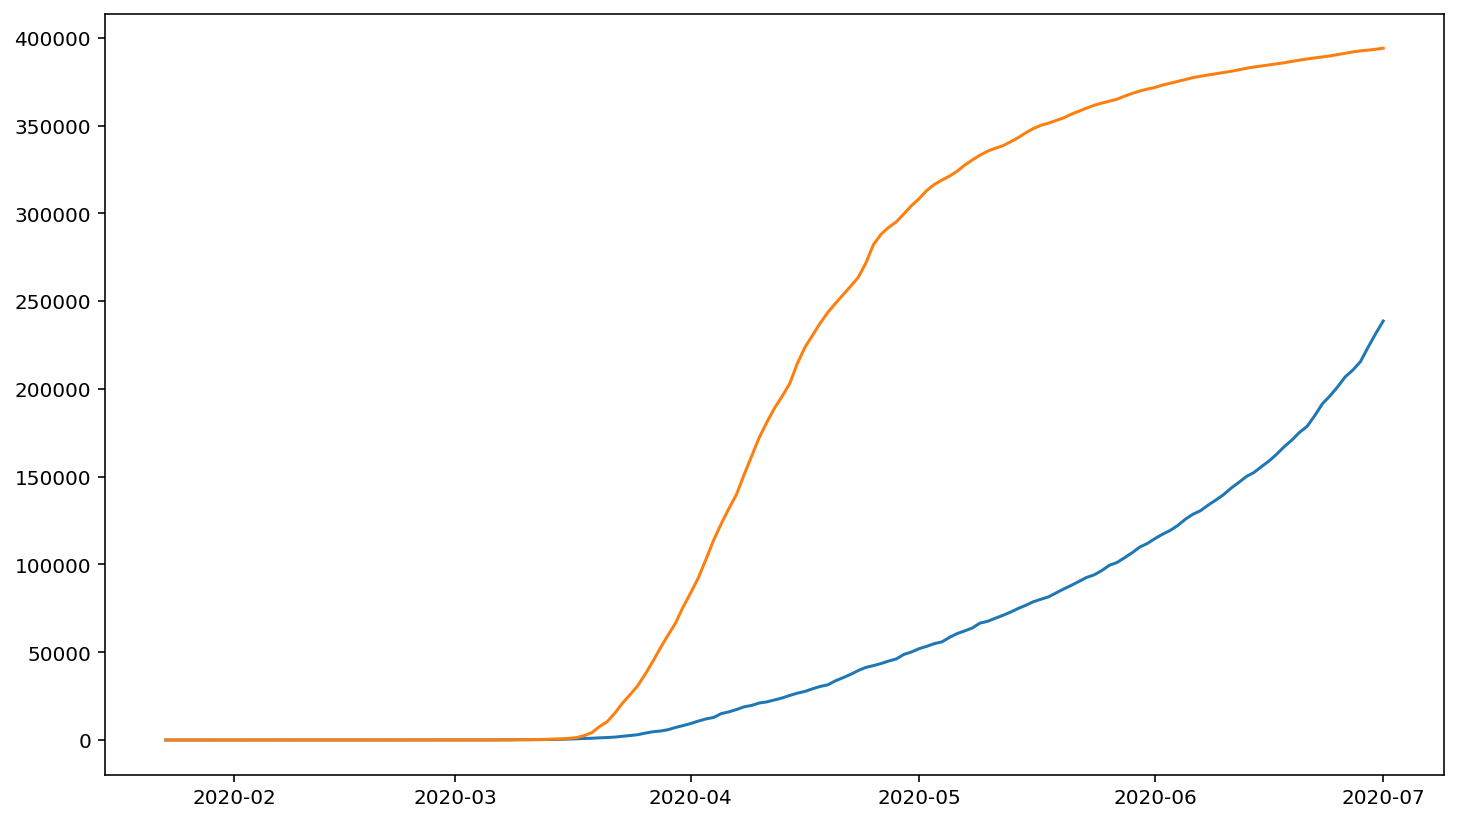

In [77]:
import matplotlib.pyplot as plt
plt.plot(ca['Date'].values, ca['Confirmed'].values)
plt.plot(ny['Date'].values, ny['Confirmed'].values)

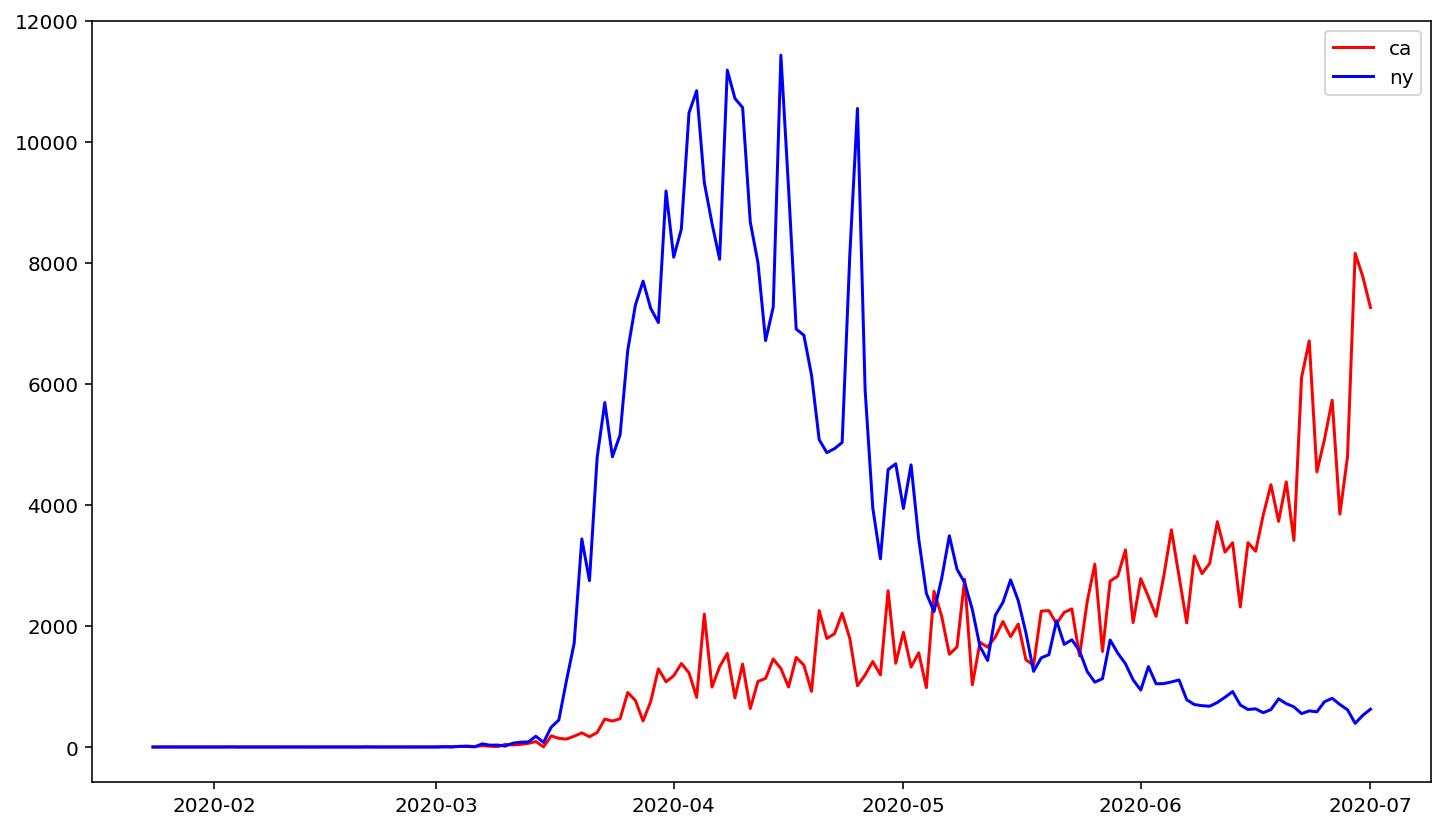

In [91]:
plt.plot(ca['Date'].values, ca['Confirmed'].diff().values, color = 'red', label = 'ca')
plt.plot(ny['Date'].values, ny['Confirmed'].diff().values, color = 'blue', label = 'ny')
plt.legend()

['Fried Rice']


{'aicamp': 0.0, 'aicamp2': 1, 'ai_camp2': 'hi', 'ai_camp3': [1, 2, 3], 'ai_camp4': {'food”:”carrot'}}


{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 8: 64, 9: 81, 10: 100, 11: 121, 12: 144, 13: 169, 14: 196, 15: 225}


{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 8: 64, 9: 81, 10: 100, 11: 121, 12: 144, 13: 169, 14: 196, 15: 225}


dict_items([('michael', 37), ('ying', 37), ('richard', 43), ('thomas', 16), ('beatrice', 16), ('clint', 2), ('david', 3)])

michael 37
ying 37
richard 43
thomas 16
beatrice 16
clint 2
david 3


michael
ying
richard


1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040 1346269 2178309 3524578 5702887 9227465 14930352 24157817 39088169 63245986 
